$$Assignment \space Eleven \\
Due \space May \space 8th \\ 
Steven \space Green \\
817121481
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spqd
from time import time
import math as math
%matplotlib inline

In [2]:
def simpson_method(a,b,N,f):
    Nint = int(N)
    Tint = 2*Nint
    xvals = np.linspace(a,b,Tint+1)
    fvals = f(xvals)
    dx = (b-a)/(2.*N)
    return dx/3.*(fvals[0] + fvals[Tint] + 2.*np.sum(fvals[2:Tint-1:2]) + 4.*np.sum(fvals[1:Tint:2]))

In [3]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol):    
    d = (a+c)/2.
    e = (b+c)/2.
    fd = f(d)
    fe = f(e)
    dx3 = (d-a)/3.
    Aac = dx3*(fa+4.*fd+fc)
    Acb = dx3*(fc+4.*fe+fb)
    if np.abs(Aab-(Aac+Acb))<=tol: 
        return (16./15.*(Aac+Acb)-Aab/15.)
    else:  
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol)
        return F1 + F2
    
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx3 = (c-a)/3.
    Aab = dx3*(fa+4.*fc+fb)
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol)    
    return ival

Problem 1: [7 points] Use the adaptive quadrature algorithm to evaluate

$$
\int_{-\pi/4}^{\pi/2} \frac{dt}{\sin\left(\sqrt{|t|} \right)}.
$$
State how you arrive at your result i.e. what tolerances do you choose and what degree of accuracy can you argue that they provide you? Why do you not encounter divide-by-zero difficulties at $t=0$?

In [9]:
# Answer to problem 1 
def f(xvals):
    fvals = 1/np.sin(np.sqrt(np.abs(xvals)))
    return fvals

In [10]:
def adap_error_test(a,b,f):
    tval = (b-a)/2. + (np.sin(2.*b)-np.sin(2.*a))/4.
    tolvals = np.array([1e-1,1e-2,1e-3,1e-4])
    Evals = np.zeros(tolvals.size)
    for jj in xrange(0,tolvals.size):
        Evals[jj] = np.log10(np.abs(tval - adap_quad(f,a,b,tolvals[jj])))
    xvals = -np.log10(tolvals)
    plt.plot(xvals,Evals)
    plt.xlabel('$-log_{10}(tol)$')
    plt.ylabel('$log_{10}(Error)$')
    
    novals = Evals.size
    slopes = (Evals[1:novals]-Evals[0:novals-1])/(xvals[1:novals]-xvals[0:novals-1])
    print np.min(slopes)
    print np.max(slopes)
    print np.mean(slopes)

In [13]:
def csq(xvals):
    return (np.sin(np.sqrt(np.abs(xvals))))

-0.04303366692848054
-0.0006192480523964372
-0.016351020236985907


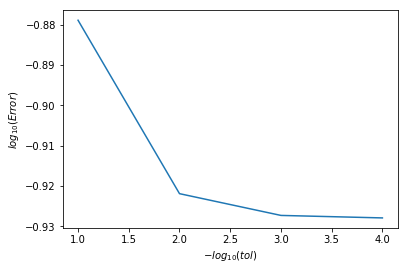

In [22]:
adap_error_test(-(np.pi/4.),np.pi/2.,csq)


Problem 2: [10 points] Definite integrals sometimes have the property that the integrand becomes infinite at one or both of the endpoints, but the integral itself is finite. In other words, $\lim_{x\rightarrow a}|f(x)|=\infty$ or $\lim_{x\rightarrow a}|f(x)|=\infty$, but

$$
\int_{a}^{b}f(x)dx 
$$
exists and is finite.

[7 points] Modify the adaptive quadrature algorithm so that if an infinite value of $f(a)$ or $f(b)$ is detected, an appropriate warning message is displayed and $f(x)$ is reevaluated at a point very near to a or b.

[3 points] Find an example that triggers the warning, but has a finite integral.

In [34]:
def adap_quad_comp2(f,a,b,c,fa,fb,fc,Aab,tol):    
    d = (a+c)/2.
    e = (b+c)/2.
    fd = f(d)
    fe = f(e)
    dx3 = (d-a)/3.
    Aac = dx3*(fa+4.*fd+fc)
    Acb = dx3*(fc+4.*fe+fb)
    if np.abs(Aab-(Aac+Acb))<=tol: 
        return (16./15.*(Aac+Acb)-Aab/15.)
    else:  
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol)
        return F1 + F2
    
def adap_quad2(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx3 = (c-a)/3.
    Aab = dx3*(fa+4.*fc+fb)
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol)    
    return ival

Problem 3: (23 pts) Consider the following table:

x | 1 | 1.1 | 1.2 | 1.3 | 1.4 
--|--|--|--|--|-- 
cos(x) | 0.54030 | 0.45360 | 0.36236 | 0.26750 | 0.16997 

(i) [10 points] Using Newton Interpolation, write a program to obtain

(ii) [2 points] A polynomial of degree 1 that interpolates $\cos(x)$.

(iii) [2 points] A polynomial of degree 2 that interpolates $\cos(x)$.

(iv) [2 points] A polynomial of degree 3 that interpolates $\cos(x)$.

(v) [2 points] A polynomial of degree 4 that interpolates $\cos(x)$.

(vi) [5 points] Compute $\cos(1.05)$ using the various order polynomials and investigate the error for the Newton polynomial approximations in (ii) - (v)

(i) [10 points] Using Newton Interpolation, write a program to obtain

(ii) [2 points] A polynomial of degree 1 that interpolates $\cos(x)$.

(iii) [2 points] A polynomial of degree 2 that interpolates $\cos(x)$.

(iv) [2 points] A polynomial of degree 3 that interpolates $\cos(x)$.

(v) [2 points] A polynomial of degree 4 that interpolates $\cos(x)$.

(vi) [5 points] Compute $\cos(1.05)$ using the various order polynomials and investigate the error for the Newton polynomial approximations in (ii) - (v)

In [19]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    # Insert code here
    n = xvals.size
    for l in xrange(0,n):
        if l != jj:
            lval *= (x-xvals[l])/float(xvals[jj]-xvals[l])  

    return lval

In [20]:
def lagran_interp(xvals,fvals,x):
    n = fvals.size
    # Insert code here 
    ipoly = np.zeros(x.size)
    for jj in xrange(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
   
    return ipoly

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


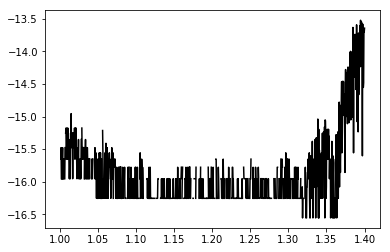

In [21]:
xinterp = np.linspace(1.,1.4,int(1e3))
ftrue =np.cos(xinterp)
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


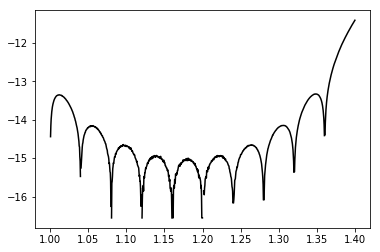

In [23]:
xinterp = np.linspace(1.,1.4,int(1e3))
ftrue =np.cos(xinterp)**2
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


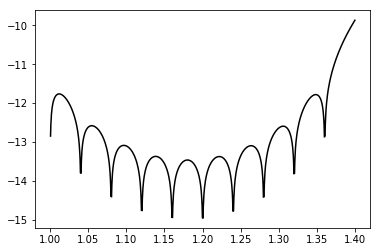

In [24]:
xinterp = np.linspace(1.,1.4,int(1e3))
ftrue =np.cos(xinterp)**3
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


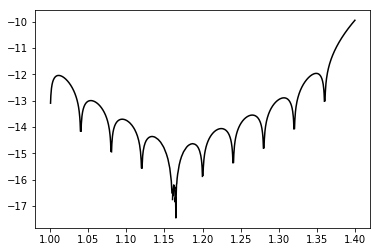

In [25]:
xinterp = np.linspace(1.,1.4,int(1e3))
ftrue =np.cos(xinterp)**4
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

In [36]:
xinterp = np.linspace(1.,1.4,int(1e3))
ftrue =np.cos(1.05)**2.
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

IndexError: invalid index to scalar variable.

Problem 4: (10 pts)

i) [8 points] Write a python program to find the cubic root of a number based on Newton method.

ii) [2 points] Using your program in i), compute the root of $a=155$

In [16]:
# Answer to problem 4

def Newtons_method(x0,rootOf,tol):
    
    f = lambda x: x**(3.)-rootOf
    fp = lambda x: 3.*x**2.
    
    x1 = x0 - f(x0)/fp(x0)
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        
    ##print "A root of f(x) is: %1.15f" %x1
    return x1

In [17]:
Newtons_method(5.,155.,1e-7)

5.371685354944832